# Plot mean, max, min in a single figure

Steps:
1. Set up subplots
2. Load data
3. Plot data
4. Add labels
5. Save the figure

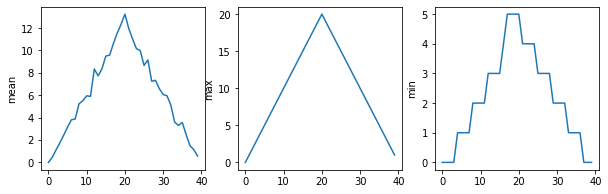

In [1]:
import numpy
import matplotlib.pyplot as plt

# Import data
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

# Setup figure
fig = plt.figure(figsize=(10.0, 3.0))

# Add subplots
axes1 = fig.add_subplot(1, 3, 1) # (nrows, ncols, pos)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

# Add labels
axes1.set_ylabel('mean')
axes2.set_ylabel('max')
axes3.set_ylabel('min')

axes1.plot(numpy.mean(data, axis=0))
axes2.plot(numpy.max(data, axis=0))
axes3.plot(numpy.min(data, axis=0))

plt.savefig('inflammation.png')
plt.show()

# Loop analysis over filenames

Steps:
1. Identy for-loop variable
2. Create list of filenames
3. Add analysis to for-loop

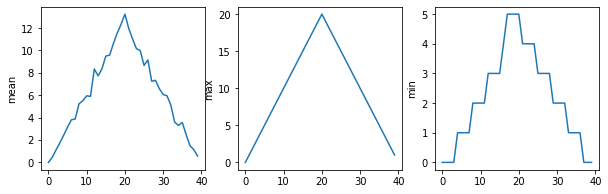

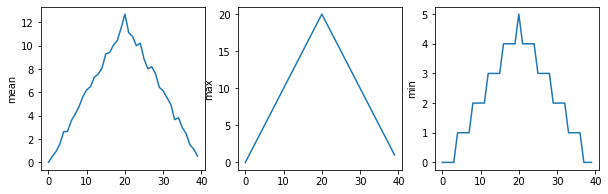

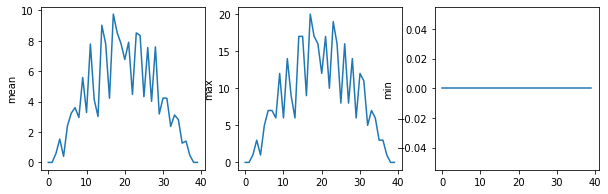

In [2]:
import glob
import numpy
import matplotlib.pyplot as plt

# Find filenames
filenames = sorted(glob.glob('data/inflammation*.csv'))
# Reduce number of plots
filenames = filenames[0:3]

for filename in filenames:

    # Import data
    data = numpy.loadtxt(fname=filename, delimiter=',')

    # Setup figure
    fig = plt.figure(figsize=(10.0, 3.0))

    # Add subplots
    axes1 = fig.add_subplot(1, 3, 1) # (nrows, ncols, pos)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    # Add labels
    axes1.set_ylabel('mean')
    axes2.set_ylabel('max')
    axes3.set_ylabel('min')

    axes1.plot(numpy.mean(data, axis=0))
    axes2.plot(numpy.max(data, axis=0))
    axes3.plot(numpy.min(data, axis=0))

    plt.savefig('inflammation.png')
    plt.show()

# Refactoring code in functions

1. Create a function for plotting data
2. Create function for checking the data
3. Call functions in a for-loop

In [3]:
def visualize(filename):
    # Import data
    data = numpy.loadtxt(fname=filename, delimiter=',')

    # Setup figure
    fig = plt.figure(figsize=(10.0, 3.0))

    # Add subplots
    axes1 = fig.add_subplot(1, 3, 1) # (nrows, ncols, pos)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    # Add labels
    axes1.set_ylabel('mean')
    axes2.set_ylabel('max')
    axes3.set_ylabel('min')

    axes1.plot(numpy.mean(data, axis=0))
    axes2.plot(numpy.max(data, axis=0))
    axes3.plot(numpy.min(data, axis=0))

    plt.savefig('inflammation.png')
    plt.show()

In [4]:
def detect_problems(filename):
    
    data = numpy.loadtxt(fname=filename, delimiter=',')
    
    max_inflammation = numpy.max(data, axis=0)
    min_inflammation = numpy.min(data, axis=0)
    
    if (max_inflammation[0] == 0) and (max_inflammation[20] == 20):
        print('Suspicious looking maxima!')   
    elif numpy.sum(min_inflammation) == 0:
        print('Minima add up to zero')
    else:
        print("Data looks OK")

In [5]:
# Function to add assertions to detect_problems. 
# 1. Add a pre-condition to find empty datasets
# 2. Add a post-condition to find suspicious data

def detect_problems_defensive(filename):
    
    # Load data
    data = numpy.loadtxt(fname=filename, delimiter=',')
    
    # Pre-condition
    assert len(data.shape[0]) > 0, 'Expected non empty dataset'
    
    # Data to test
    max_inflammation = numpy.max(data, axis=0)
    min_inflammation = numpy.min(data, axis=0)
    
    # Post-condition
    # Notice that the assertions are testing the opposite compared to the if-statements. Think about why that is
    assert (max_inflammation[0] != 0) and (max_inflammation[20] != 20), 'Suspicious looking maxima!'
    assert numpy.sum(min_inflammation) != 0, 'Minima add up to zero!'
    
    print('Data looks OK')    

data\inflammation-01.csv
Suspicious looking maxima!


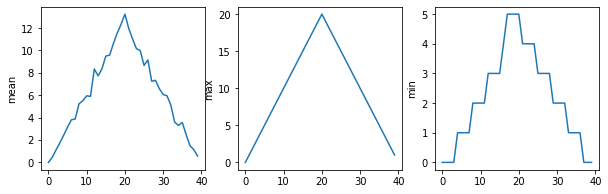

data\inflammation-02.csv
Suspicious looking maxima!


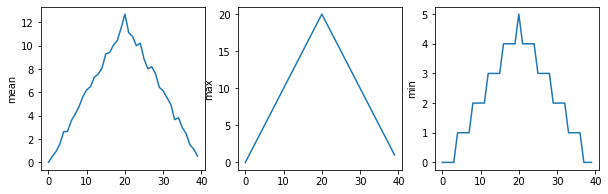

data\inflammation-03.csv
Minima add up to zero


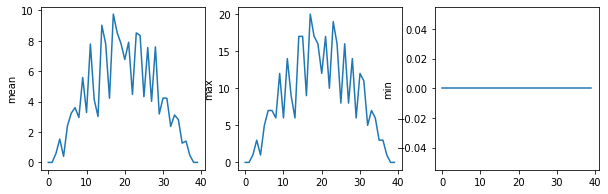

In [6]:
# Combine function
import glob
import numpy
import matplotlib.pyplot as plt

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]

for filename in filenames:
    print(filename)
    detect_problems(filename)
#     detect_problems_defensive(filename)
    visualize(filename)